In [2]:
import os
from chemwalker.gnps import Proteosafe
from chemwalker.utils import run_metfrag, walk_conn_comp, get_db
from chemwalker.draw import *
import pandas as pd
import numpy as np

RDKit WARNING: [12:24:51] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
taskid = '19e2a7f29df248518b13c5ded5dd3bcd'

gnps_result = Proteosafe(taskid, 'FBMN-gnps2')
gnps_result.get_gnps()
net = gnps_result.net
gnps_tab = gnps_result.gnps
spectra = gnps_result.spectra
match_tab = gnps_result.dbmatch

In [3]:
feat = gnps_result.feat

feat.head()

,row ID,row m/z,row retention time,intensity_measure,s200525_Dog_Blank_01.mzXML Peak area,s200525_Dog_4h_02.mzXML Peak area,s200525_Dog_4h_03.mzXML Peak area,s200525_Dog_4h_01.mzXML Peak area,s200525_Dog_Blank_03.mzXML Peak area,s200525_Dog_Blank_02.mzXML Peak area,...,s200525_Mou_4h_03.mzXML Peak area,s200525_Mou_4h_02.mzXML Peak area,s200525_Rat_4h_02.mzXML Peak area,s200525_Mou_Blank_03.mzXML Peak area,s200525_Rat_Blank_02.mzXML Peak area,s200525_Rat_4h_01.mzXML Peak area,s200525_Rat_Blank_03.mzXML Peak area,s200525_Rat_4h_03.mzXML Peak area,s200525_Rat_Blank_01.mzXML Peak area,Unnamed: 33
0,1,568.299541,33.925083,area,8.065419e+07,7.794631e+07,7.938951e+07,7.949309e+07,7.707818e+07,7.954920e+07,...,3.788302e+07,3.128927e+07,7.469028e+07,7.493711e+07,7.459483e+07,7.459669e+07,7.761065e+07,7.766036e+07,7.528491e+07,NaN
1,2,573.254828,33.918372,area,7.002323e+07,6.818548e+07,7.086606e+07,6.946290e+07,6.465168e+07,6.862157e+07,...,7.465150e+07,6.414286e+07,6.895838e+07,6.878195e+07,6.911714e+07,6.873856e+07,7.406526e+07,7.415805e+07,6.869015e+07,NaN
2,3,304.299661,34.210333,area,8.811130e+06,8.595674e+06,8.576442e+06,8.668024e+06,8.721768e+06,8.681372e+06,...,9.680476e+06,8.788321e+06,9.641693e+06,8.829966e+06,8.595865e+06,7.023870e+06,6.974862e+06,8.650843e+06,8.536900e+06,NaN
3,4,381.081324,1.804906,area,2.464462e+07,2.368617e+07,2.624698e+07,3.131896e+07,2.403872e+07,2.400652e+07,...,2.382829e+07,2.164969e+07,2.064907e+07,2.484689e+07,2.105007e+07,2.081215e+07,1.923356e+07,2.015628e+07,2.124180e+07,NaN
4,5,332.332161,34.492267,area,1.448463e+07,1.429377e+07,1.405203e+07,1.418293e+07,1.435455e+07,1.443068e+07,...,1.473611e+07,1.473844e+07,1.433900e+07,1.456569e+07,1.165663e+07,1.178992e+07,1.438783e+07,1.441127e+07,1.175091e+07,NaN


In [4]:
net.loc[net['ComponentIndex']==8,['CLUSTERID1', 'CLUSTERID2']].melt().value.unique()

array([10312, 10324, 10340, 11143, 11885, 10898, 10309, 24889, 24901,
       25320, 10308, 13638, 19994, 10311, 10325, 10329, 10320, 10872,
       10502, 10516, 10574, 10808, 24986, 24942, 30818, 25324, 10336,
       20198, 30797, 16869, 10319, 13116])

In [5]:
feat[feat['row ID'].isin(net.loc[net['ComponentIndex']==8,['CLUSTERID1', 'CLUSTERID2']].melt().value.unique())]

,row ID,row m/z,row retention time,intensity_measure,s200525_Dog_Blank_01.mzXML Peak area,s200525_Dog_4h_02.mzXML Peak area,s200525_Dog_4h_03.mzXML Peak area,s200525_Dog_4h_01.mzXML Peak area,s200525_Dog_Blank_03.mzXML Peak area,s200525_Dog_Blank_02.mzXML Peak area,...,s200525_Mou_4h_03.mzXML Peak area,s200525_Mou_4h_02.mzXML Peak area,s200525_Rat_4h_02.mzXML Peak area,s200525_Mou_Blank_03.mzXML Peak area,s200525_Rat_Blank_02.mzXML Peak area,s200525_Rat_4h_01.mzXML Peak area,s200525_Rat_Blank_03.mzXML Peak area,s200525_Rat_4h_03.mzXML Peak area,s200525_Rat_Blank_01.mzXML Peak area,Unnamed: 33
167,10308,491.210397,18.720228,area,14868.207008,5.055666e+07,4.981488e+07,4.989877e+07,930.719700,3099.546447,...,2.467861e+07,2.469933e+07,6.395522e+06,15612.726627,4087.598843,6.439645e+06,11133.680705,6.398599e+06,1899.797413,NaN
168,10309,475.216110,17.288011,area,5363.158565,2.554798e+07,2.755604e+07,2.640372e+07,4519.892493,12572.843465,...,4.023977e+07,4.067315e+07,2.449276e+06,23231.179942,10540.340180,1.809090e+06,8853.350721,1.882493e+06,2495.958258,NaN
170,10311,461.201073,17.175077,area,0.000000,1.359855e+07,1.346625e+07,1.345125e+07,0.000000,0.000000,...,8.775379e+06,8.635262e+06,3.767916e+07,1978.249099,673.659856,3.821955e+07,768.670458,3.732100e+07,823.795071,NaN
171,10312,449.198554,12.501910,area,1549.101873,5.716469e+06,5.550446e+06,5.843789e+06,985.621034,678.931192,...,5.044573e+06,4.916130e+06,2.399778e+06,4577.201678,4858.472342,2.422326e+06,6104.816021,2.400196e+06,8103.793222,NaN
177,10319,513.190741,18.705292,area,0.000000,3.621915e+06,3.592260e+06,3.554731e+06,0.000000,0.000000,...,2.129382e+06,2.018473e+06,5.840742e+05,0.000000,0.000000,5.820309e+05,0.000000,5.848099e+05,0.000000,NaN
178,10320,377.130888,12.425352,area,0.000000,2.692875e+06,2.639009e+06,2.567449e+06,784.185852,0.000000,...,3.890874e+06,3.774963e+06,1.698658e+06,611.350527,0.000000,1.747428e+06,0.000000,1.754064e+06,0.000000,NaN
182,10324,447.182522,9.208023,area,1598.639912,1.245908e+06,1.176851e+06,1.226666e+06,674.191879,0.000000,...,1.308644e+05,1.360599e+05,4.147707e+05,1248.871570,19202.867034,4.188702e+05,31001.412534,4.072570e+05,13506.901332,NaN
183,10325,435.184074,11.822786,area,657.682644,1.312933e+06,1.231429e+06,1.283697e+06,0.000000,0.000000,...,2.175607e+06,2.135664e+06,9.737536e+06,0.000000,0.000000,9.732624e+06,0.000000,9.845310e+06,0.000000,NaN
185,10329,477.193322,26.137008,area,0.000000,1.581063e+06,1.482790e+06,1.497789e+06,0.000000,834.325045,...,9.431252e+05,9.152058e+05,3.643499e+06,0.000000,0.000000,3.691867e+06,0.000000,3.569521e+06,825.515912,NaN
190,10336,477.194138,10.008155,area,0.000000,7.208977e+05,6.809027e+05,7.167065e+05,0.000000,0.000000,...,2.301641e+05,2.218275e+05,8.633147e+03,0.000000,0.000000,1.458439e+04,0.000000,1.313485e+04,0.000000,NaN


In [12]:
feat.to_csv('f9e3f27_feat.csv', index=None)

In [6]:
meta = gnps_result.meta

meta.head()

,filename,ATTRIBUTE_SampleType,ATTRIBUTE_AnimalModel,ATTRIBUTE_IngExp,ATTRIBUTE_Time,ATTRIBUTE_AcquisitionDate
0,s200512_0h_01.mzXML,sample,Human,Human_0h,0h,2020.05.12
1,s200512_0h_02.mzXML,sample,Human,Human_0h,0h,2020.05.12
2,s200512_0h_03.mzXML,sample,Human,Human_0h,0h,2020.05.12
3,s200512_30m_01.mzXML,sample,Human,Human_30min,30min,2020.05.12
4,s200512_30m_02.mzXML,sample,Human,Human_30min,30min,2020.05.12


In [7]:
meta.shape

(51, 6)

In [8]:
meta.ATTRIBUTE_AnimalModel.value_counts()

Human     27
Mouse      6
Monkey     6
Rat        6
Dog        6
Name: ATTRIBUTE_AnimalModel, dtype: int64

In [9]:
feat2 = feat[feat.columns[feat.columns.str.contains('Peak area')]].T
feat2.columns = feat.apply(lambda a: '{0}_{1}'.format(round(a['row m/z']), round(a['row retention time']*60)), axis=1).tolist()
feat2 = feat2.reset_index()
feat2['index'] = feat2['index'].str.replace(' Peak area', '')
feat2

,index,568_2036,573_2035,304_2053,381_108,332_2070,759_2214,616_2054,675_2070,391_2181,...,594_525,480_1069,365_151,378_184,636_894,379_409,548_684,467_634,393_553,514_427
0,s200525_Dog_Blank_01.mzXML,8.065419e+07,7.002323e+07,8.811130e+06,2.464462e+07,1.448463e+07,4.552300e+07,4.070211e+06,3.380187e+06,9.167510e+06,...,0.000000,0.000000,0.000000,0.000000,674.519651,6593.792035,837.842848,4274.550327,14441.914104,72809.046160
1,s200525_Dog_4h_02.mzXML,7.794631e+07,6.818548e+07,8.595674e+06,2.368617e+07,1.429377e+07,4.585710e+06,4.048113e+06,3.380733e+06,8.953209e+06,...,0.000000,0.000000,0.000000,877.594712,1302.548395,15430.467451,3600.016153,12886.454838,4367.208052,153122.598637
2,s200525_Dog_4h_03.mzXML,7.938951e+07,7.086606e+07,8.576442e+06,2.624698e+07,1.405203e+07,2.663101e+06,3.956534e+06,3.357642e+06,9.101056e+06,...,0.000000,0.000000,0.000000,2016.139983,0.000000,7822.506040,2525.758847,16572.580100,6161.484318,77420.222283
3,s200525_Dog_4h_01.mzXML,7.949309e+07,6.946290e+07,8.668024e+06,3.131896e+07,1.418293e+07,3.082350e+07,4.018123e+06,3.340487e+06,8.777770e+06,...,0.000000,0.000000,0.000000,0.000000,840.837560,13296.821256,1258.061515,13541.445292,9656.953696,17736.268741
4,s200525_Dog_Blank_03.mzXML,7.707818e+07,6.465168e+07,8.721768e+06,2.403872e+07,1.435455e+07,6.208906e+07,3.977052e+06,3.348411e+06,9.198234e+06,...,0.000000,754.347928,0.000000,1021.771788,774.549925,8827.659063,904.036594,16052.462866,6354.647847,65936.756423
5,s200525_Dog_Blank_02.mzXML,7.954920e+07,6.862157e+07,8.681372e+06,2.400652e+07,1.443068e+07,5.965366e+07,4.018441e+06,3.370538e+06,8.877638e+06,...,0.000000,674.641761,0.000000,695.151901,701.990026,11077.182944,2813.964011,15775.591963,7547.874365,67777.215952
6,s200525_HUMAN_4h_01.mzXML,7.934947e+07,7.272965e+07,8.830331e+06,2.168017e+07,1.486065e+07,3.919116e+07,4.009955e+06,3.393720e+06,1.129618e+07,...,0.000000,0.000000,0.000000,818.971729,892.124318,14076.556165,4668.467609,14932.623503,4024.016757,17828.399010
7,s200525_HUMAN_4h_02.mzXML,7.839534e+07,7.176542e+07,9.716678e+06,2.301324e+07,1.460641e+07,3.676914e+07,4.031312e+06,3.284542e+06,9.705555e+06,...,0.000000,0.000000,0.000000,0.000000,749.120104,15785.138625,784.964500,13882.460673,2928.579179,60097.120780
8,s200525_HUMAN_Blank_02.mzXML,7.951192e+07,7.951319e+07,9.665446e+06,2.054942e+07,1.441755e+07,3.601203e+07,4.081977e+06,3.433514e+06,3.265138e+07,...,0.000000,0.000000,0.000000,726.284257,1978.585205,15349.261197,3092.494891,12707.027867,9453.437971,89525.470941
9,s200525_HUMAN_4h_03.mzXML,7.742824e+07,7.082545e+07,8.911479e+06,2.143712e+07,1.472947e+07,4.046269e+07,3.982437e+06,3.329188e+06,9.787074e+06,...,0.000000,0.000000,0.000000,961.055625,3695.703512,8857.396424,13501.773832,12082.245404,4143.997458,56473.553749


In [10]:
pd.merge(meta, feat2, left_on='filename', right_on='index').drop(['index'], axis=1)

,filename,ATTRIBUTE_SampleType,ATTRIBUTE_AnimalModel,ATTRIBUTE_IngExp,ATTRIBUTE_Time,ATTRIBUTE_AcquisitionDate,568_2036,573_2035,304_2053,381_108,...,594_525,480_1069,365_151,378_184,636_894,379_409,548_684,467_634,393_553,514_427
0,s200525_HUMAN_4h_01.mzXML,sample,Human,Human_4h,4h,2020.05.25,7.934947e+07,7.272965e+07,8.830331e+06,2.168017e+07,...,0.000000,0.000000,0.000000,818.971729,892.124318,14076.556165,4668.467609,14932.623503,4024.016757,17828.399010
1,s200525_HUMAN_4h_02.mzXML,sample,Human,Human_4h,4h,2020.05.25,7.839534e+07,7.176542e+07,9.716678e+06,2.301324e+07,...,0.000000,0.000000,0.000000,0.000000,749.120104,15785.138625,784.964500,13882.460673,2928.579179,60097.120780
2,s200525_HUMAN_4h_03.mzXML,sample,Human,Human_4h,4h,2020.05.25,7.742824e+07,7.082545e+07,8.911479e+06,2.143712e+07,...,0.000000,0.000000,0.000000,961.055625,3695.703512,8857.396424,13501.773832,12082.245404,4143.997458,56473.553749
3,s200525_HUMAN_Blank_01.mzXML,blank,Human,Human_Blank,NaN,2020.05.25,8.099839e+07,7.229425e+07,1.429460e+04,2.053008e+07,...,0.000000,0.000000,0.000000,1304.568617,1363.996694,18093.312737,1808.594249,11716.811743,8124.143448,32225.143174
4,s200525_HUMAN_Blank_02.mzXML,blank,Human,Human_Blank,NaN,2020.05.25,7.951192e+07,7.951319e+07,9.665446e+06,2.054942e+07,...,0.000000,0.000000,0.000000,726.284257,1978.585205,15349.261197,3092.494891,12707.027867,9453.437971,89525.470941
5,s200525_HUMAN_Blank_03.mzXML,blank,Human,Human_Blank,NaN,2020.05.25,7.474179e+07,7.312357e+07,8.913547e+06,2.070026e+07,...,0.000000,0.000000,0.000000,0.000000,3453.513276,9878.374010,3749.776841,10594.964337,4857.398873,115872.787904
6,s200525_Mou_4h_01.mzXML,sample,Mouse,Mouse_4h,4h,2020.05.25,4.026548e+07,7.369045e+07,9.614149e+06,2.388126e+07,...,3952.079843,0.000000,0.000000,0.000000,8879.913870,8384.894139,13267.079403,14769.876412,6997.608906,120272.717808
7,s200525_Mou_4h_02.mzXML,sample,Mouse,Mouse_4h,4h,2020.05.25,3.128927e+07,6.414286e+07,8.788321e+06,2.164969e+07,...,3579.116532,0.000000,0.000000,0.000000,6900.155774,13458.866167,8769.658033,10329.324681,19299.765399,47300.118382
8,s200525_Mou_4h_03.mzXML,sample,Mouse,Mouse_4h,4h,2020.05.25,3.788302e+07,7.465150e+07,9.680476e+06,2.382829e+07,...,2897.526220,707.012743,0.000000,0.000000,4002.553503,14796.256344,6450.885343,8126.775906,12206.800784,29318.748657
9,s200525_Mou_Blank_01.mzXML,blank,Mouse,Mouse_Blank,NaN,2020.05.25,7.599077e+07,6.877122e+07,8.764695e+06,2.456909e+07,...,4170.396857,724.911460,48965.396261,0.000000,3838.864721,13479.800263,7004.075475,13714.754824,25030.833715,60481.905342


In [18]:
pd.merge(meta, feat2, left_on='filename', right_on='index').drop(['index'], axis=1).to_csv('f9e3f27_capp.csv', index=None)

In [11]:
match_tab.head()

,SpectrumID,#Scan#,SpectrumFile,LibraryName,MQScore,TIC_Query,RT_Query,MZErrorPPM,SharedPeaks,MassDiff,...,molecular_formula,InChIKey,InChIKey-Planar,superclass,class,subclass,npclassifier_superclass,npclassifier_class,npclassifier_pathway,library_usi
2,CCMSLIB00003138482,10318,spectra_filtered.mgf,GNPS-NIST14-MATCHES.mgf,0.966838,53124.8,0,0.240743,6,0.000183,...,NaN,WTJKGGKOPKCXLL-VYOBOKEXSA-N,WTJKGGKOPKCXLL,Lipids and lipid-like molecules,Glycerophospholipids,Glycerophosphocholines,NaN,NaN,NaN,mzspec:GNPS:GNPS-LIBRARY:CCMSLIB00003138482
6,CCMSLIB00012121635,23,spectra_filtered.mgf,GNPS-SUSPECTLIST.mgf,0.899663,21448.3,0,10.091400,7,0.005493,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mzspec:GNPS:GNPS-LIBRARY:CCMSLIB00012121635
7,CCMSLIB00012121537,65,spectra_filtered.mgf,GNPS-SUSPECTLIST.mgf,0.869396,16154.4,0,3.870820,6,0.002014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mzspec:GNPS:GNPS-LIBRARY:CCMSLIB00012121537
8,CCMSLIB00012121554,69,spectra_filtered.mgf,GNPS-SUSPECTLIST.mgf,0.862819,12230.1,0,19.306600,8,0.009583,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mzspec:GNPS:GNPS-LIBRARY:CCMSLIB00012121554
9,CCMSLIB00000004805,10309,spectra_filtered.mgf,GNPS-SELLECKCHEM-FDA-PART1.mgf,0.854279,46101.4,0,6.486090,13,0.003082,...,C28H38N6O11S,DEIYFTQMQPDXOT-UHFFFAOYSA-N,DEIYFTQMQPDXOT,Benzenoids,Benzene and substituted derivatives,Benzenesulfonamides,NaN,NaN,Alkaloids,mzspec:GNPS:GNPS-LIBRARY:CCMSLIB00000004805


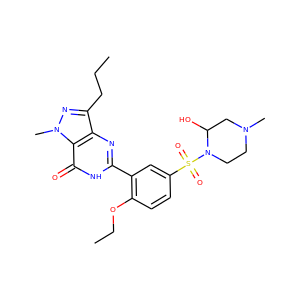

In [12]:
candidate = Chem.MolFromInchi("InChI=1S/C22H30N6O5S/c1-5-7-16-19-20(27(4)25-16)22(30)24-21(23-19)15-12-14(8-9-17(15)33-6-2)34(31,32)28-11-10-26(3)13-18(28)29/h8-9,12,18,29H,5-7,10-11,13H2,1-4H3,(H,23,24,30)")
Chem.Draw.MolToImage(candidate)

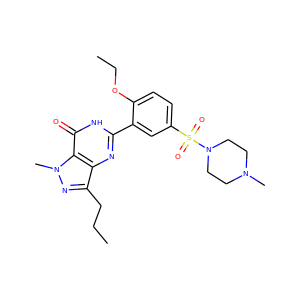

In [13]:
from rdkit import Chem

parent = Chem.MolFromSmiles("CCCc1nn(C)c2c1nc([nH]c2=O)-c1cc(ccc1OCC)S(=O)(=O)N1CCN(C)CC1")
Chem.Draw.MolToImage(parent)

In [33]:
sildenafil =  pd.read_csv('Sildenafil_Sygma_3_2_metabolites.tsv', sep='\t')
sildenafil.reset_index(inplace=True)

In [40]:
'M'+sildenafil['index'].astype(str)

0            M0
1            M1
2            M2
3            M3
4            M4
          ...  
32386    M32386
32387    M32387
32388    M32388
32389    M32389
32390    M32390
Name: index, Length: 32391, dtype: object

In [42]:
sildenafil['index'] = 'M'+sildenafil['index'].astype(str)
sildenafil.head()

,index,metabolite,score,parent
0,M0,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCNCC4...,0.418000,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(C)...
1,M1,CCCc1n[nH]c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(C)...,0.253000,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(C)...
2,M2,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CC[N+]...,0.190000,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(C)...
3,M3,CCOc1ccc(S(=O)(=O)N2CCN(C)CC2)cc1-c1nc2c(CC(C)...,0.106000,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(C)...
4,M4,CCCc1n[nH]c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCNCC4...,0.105754,CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(C)...


In [43]:
sildenafil[['metabolite', 'parent']].to_csv('sildenafil__metabolites', index=None, header=None, sep='\t')

In [28]:
Chem.MolToInchi(parent)

'InChI=1S/C22H30N6O4S/c1-5-7-17-19-20(27(4)25-17)22(29)24-21(23-19)16-14-15(8-9-18(16)32-6-2)33(30,31)28-12-10-26(3)11-13-28/h8-9,14H,5-7,10-13H2,1-4H3,(H,23,24,29)'

In [30]:
Chem.MolToInchiKey(parent)

'BNRNXUUZRGQAQC-UHFFFAOYSA-N'

In [25]:
match_tab['Compound_Name'].str.contains('Side').sum()

np.int64(0)

In [13]:
net.shape

(280, 5)

In [14]:
net['ComponentIndex'].value_counts().to_dict()

{8: 79,
 5: 52,
 4: 36,
 13: 30,
 1: 28,
 2: 16,
 14: 11,
 10: 8,
 26: 3,
 22: 3,
 3: 1,
 6: 1,
 9: 1,
 15: 1,
 12: 1,
 11: 1,
 18: 1,
 16: 1,
 21: 1,
 19: 1,
 23: 1,
 24: 1,
 25: 1,
 27: 1}

In [5]:
nset = net['ComponentIndex'].unique().tolist()
nset

[1,
 2,
 3,
 4,
 6,
 7,
 9,
 10,
 11,
 12,
 13,
 14,
 17,
 18,
 19,
 21,
 23,
 24,
 27,
 28,
 29,
 34,
 35,
 39,
 42,
 44]

In [6]:
match_tab.head()

,SpectrumID,Compound_Name,Ion_Source,Instrument,Compound_Source,PI,Data_Collector,Adduct,Precursor_MZ,ExactMass,...,MoleculeExplorerFiles,molecular_formula,InChIKey,InChIKey-Planar,superclass,class,subclass,npclassifier_superclass,npclassifier_class,npclassifier_pathway
0,CCMSLIB00011427969,HOMOORIENTIN(ISOORIENTIN),ESI,Orbitrap,Commercial,Cech,Vicky Anderson,M+H,449.108,448.101,...,0,C21H20O11,ODBRNZZJSYPIDI-UHFFFAOYSA-N,ODBRNZZJSYPIDI,Phenylpropanoids and polyketides,Flavonoids,Flavonoid glycosides,Flavonoids,Flavones,Shikimates and Phenylpropanoids
1,CCMSLIB00011427969,HOMOORIENTIN(ISOORIENTIN),ESI,Orbitrap,Commercial,Cech,Vicky Anderson,M+H,449.108,448.101,...,0,C21H20O11,ODBRNZZJSYPIDI-UHFFFAOYSA-N,ODBRNZZJSYPIDI,Phenylpropanoids and polyketides,Flavonoids,Flavonoid glycosides,Flavonoids,Flavones,Shikimates and Phenylpropanoids
5,CCMSLIB00006674103,Caffeic_acid_4B_Glucuronide,ESI,Orbitrap,Commercial,Ulaszewska,Marynka Ulaszewska,M+H,357.082,356.074,...,0,C15H16O10,LTGOIJNQWZWJRF-UHFFFAOYSA-N,LTGOIJNQWZWJRF,Organic oxygen compounds,Organooxygen compounds,Carbohydrates and carbohydrate conjugates,Phenylpropanoids (C6-C3),Cinnamic acids and derivatives,Shikimates and Phenylpropanoids
6,CCMSLIB00006117022,Cortisol - 30.0 eV,ESI,Orbitrap,Isolated,PI,Data Collector,M+H,363.217,0.000,...,0,C21H30O5,JYGXADMDTFJGBT-VWUMJDOOSA-N,JYGXADMDTFJGBT,Lipids and lipid-like molecules,Steroids and steroid derivatives,Hydroxysteroids,Steroids,Pregnane steroids,Terpenoids
7,CCMSLIB00006119745,Chlorogenic acid - 40.0 eV,ESI,Orbitrap,Isolated,PI,Data Collector,M+H,355.103,0.000,...,0,C16H18O9,CWVRJTMFETXNAD-JUHZACGLSA-N,CWVRJTMFETXNAD,Organic oxygen compounds,Organooxygen compounds,Alcohols and polyols,Phenylpropanoids (C6-C3),Cinnamic acids and derivatives,Shikimates and Phenylpropanoids


In [7]:
match_tab.columns

Index(['SpectrumID', 'Compound_Name', 'Ion_Source', 'Instrument',
       'Compound_Source', 'PI', 'Data_Collector', 'Adduct', 'Precursor_MZ',
       'ExactMass', 'Charge', 'CAS_Number', 'Pubmed_ID', 'Smiles', 'INCHI',
       'INCHI_AUX', 'Library_Class', 'IonMode', 'UpdateWorkflowName',
       'LibraryQualityString', '#Scan#', 'SpectrumFile', 'LibraryName',
       'MQScore', 'Organism', 'TIC_Query', 'RT_Query', 'MZErrorPPM',
       'SharedPeaks', 'MassDiff', 'LibMZ', 'SpecMZ', 'SpecCharge',
       'FileScanUniqueID', 'NumberHits', 'tags', 'MoleculeExplorerDatasets',
       'MoleculeExplorerFiles', 'molecular_formula', 'InChIKey',
       'InChIKey-Planar', 'superclass', 'class', 'subclass',
       'npclassifier_superclass', 'npclassifier_class',
       'npclassifier_pathway'],
      dtype='object')

In [8]:
gnps_tab.head()

,cluster index,parent mass,RTMean,ATTRIBUTE_Sample_Number:GNPSGROUP:10,ATTRIBUTE_Sample_Number:GNPSGROUP:11,ATTRIBUTE_Sample_Number:GNPSGROUP:12,ATTRIBUTE_Sample_Number:GNPSGROUP:78,ATTRIBUTE_Sample_Number:GNPSGROUP:79,ATTRIBUTE_Sample_Number:GNPSGROUP:80,ATTRIBUTE_Sample_Number:GNPSGROUP:152,...,ATTRIBUTE_Asat:GNPSGROUP:24.941,ATTRIBUTE_C:GNPSGROUP:14.155,ATTRIBUTE_C:GNPSGROUP:20.231,ATTRIBUTE_C:GNPSGROUP:22.241,ATTRIBUTE_C:GNPSGROUP:18.426,ATTRIBUTE_N:GNPSGROUP:nan,ATTRIBUTE_C/N:GNPSGROUP:nan,component,#Scan#,Compound_Name
0,5,353.265401,35.119569,860049.175,1.281668e+06,1.099282e+06,1631616.110,1.441528e+06,1254956.950,900838.985,...,8.953386e+05,1.080333e+06,1.442700e+06,1.076078e+06,8.953386e+05,NaN,NaN,-1,NaN,NaN
1,7,381.296298,37.262528,915588.990,1.249140e+06,9.998174e+05,1445426.520,1.270731e+06,1234167.890,800190.520,...,8.610748e+05,1.054849e+06,1.316775e+06,1.016424e+06,8.610748e+05,NaN,NaN,2,NaN,NaN
2,8,581.148154,7.884651,1779064.237,5.228738e+06,1.348523e+06,1536205.639,2.423437e+04,127515.698,36034.871,...,5.938552e+05,2.785442e+06,5.626519e+05,1.093534e+05,5.938552e+05,NaN,NaN,3,8.0,Isoshaftoside
6,10,609.268397,35.247439,1900706.545,1.099087e+06,5.505347e+05,1259964.695,3.167505e+05,525107.070,325802.580,...,1.782752e+06,1.183443e+06,7.006074e+05,4.647201e+05,1.782752e+06,NaN,NaN,1,10.0,3.10S-Hydroxypheophorbide a
7,13,305.156498,49.782424,559341.440,8.127709e+05,6.643086e+05,299720.325,4.172964e+05,714114.810,683273.360,...,2.644902e+05,6.788070e+05,4.770438e+05,7.642802e+05,2.644902e+05,NaN,NaN,2,NaN,NaN


In [14]:
spectra[0]

{'params': {'feature_id': '1',
  'pepmass': (568.2995, None),
  'scans': '1',
  'rtinseconds': 2035.505 second,
  'charge': [1],
  'mslevel': '2'},
 'm/z array': array([100.0046, 100.0474, 100.1696, ..., 998.626 , 998.7822, 999.2878]),
 'intensity array': array([8.6e+01, 7.6e+03, 1.6e+02, ..., 5.4e+00, 5.1e+00, 1.1e+01]),
 'charge array': masked_array(data=[--, --, --, ..., --, --, --],
              mask=[ True,  True,  True, ...,  True,  True,  True],
        fill_value=0,
             dtype=int64)}

In [15]:
gnps_result.check_comp(8)

Component of 32 nodes, with 3 InChI or Smiles present.


In [11]:
db = get_db()
db.head()

,MonoisotopicMass,InChI,SMILES,Identifier,InChIKey2,InChIKey1,MolecularFormula,kingdom_name,superclass_name,class_name,subclass_name
0,194.05791,InChI=1/C10H10O4/c1-14-9-6-7(2-4-8(9)11)3-5-10...,COC1=C(C=CC(=C1)C=CC(=O)O)O,CCMSLIB00000220714,UHFFFAOYSA,KSEBMYQBYZTDHS,C10H10O4,Organic compounds,Phenylpropanoids and polyketides,Cinnamic acids and derivatives,Hydroxycinnamic acids and derivatives
1,176.09496,InChI=1/C10H12N2O/c11-4-3-7-6-12-10-2-1-8(13)5...,C1=CC2=C(C=C1O)C(=CN2)CCN,CCMSLIB00000220735,UHFFFAOYSA,QZAYGJVTTNCVMB,C10H12N2O,Organic compounds,Organoheterocyclic compounds,Indoles and derivatives,Tryptamines and derivatives
2,176.04734,InChI=1/C10H8O3/c1-6-4-10(12)13-9-5-7(11)2-3-8...,CC1=CC(=O)OC2=C1C=CC(=C2)O,CCMSLIB00000221773,UHFFFAOYSA,HSHNITRMYYLLCV,C10H8O3,NaN,NaN,NaN,NaN
3,345.07864,"InChI=1/C12H17N4O4PS/c1-8-11(3-4-20-21(17,18)1...",CC1=C(SC=[N+]1CC2=CN=C(N=C2N)C)CCOP(=O)(O)O,CCMSLIB00000221098,UHFFFAOYSA,HZSAJDVWZRBGIF,C12H18N4O4PS,Organic compounds,Organoheterocyclic compounds,Diazines,Pyrimidines and pyrimidine derivatives
4,342.11621,InChI=1/C12H22O11/c13-1-4-6(15)8(17)9(18)11(22...,C(C1C(C(C(C(O1)OCC2C(C(C(O2)(CO)O)O)O)O)O)O)O,CCMSLIB00000222747,UHFFFAOYSA,PVXPPJIGRGXGCY,C12H22O11,NaN,NaN,NaN,NaN


In [12]:
db.head()

,MonoisotopicMass,InChI,SMILES,Identifier,InChIKey2,InChIKey1,MolecularFormula,kingdom_name,superclass_name,class_name,subclass_name
0,194.05791,InChI=1/C10H10O4/c1-14-9-6-7(2-4-8(9)11)3-5-10...,COC1=C(C=CC(=C1)C=CC(=O)O)O,CCMSLIB00000220714,UHFFFAOYSA,KSEBMYQBYZTDHS,C10H10O4,Organic compounds,Phenylpropanoids and polyketides,Cinnamic acids and derivatives,Hydroxycinnamic acids and derivatives
1,176.09496,InChI=1/C10H12N2O/c11-4-3-7-6-12-10-2-1-8(13)5...,C1=CC2=C(C=C1O)C(=CN2)CCN,CCMSLIB00000220735,UHFFFAOYSA,QZAYGJVTTNCVMB,C10H12N2O,Organic compounds,Organoheterocyclic compounds,Indoles and derivatives,Tryptamines and derivatives
2,176.04734,InChI=1/C10H8O3/c1-6-4-10(12)13-9-5-7(11)2-3-8...,CC1=CC(=O)OC2=C1C=CC(=C2)O,CCMSLIB00000221773,UHFFFAOYSA,HSHNITRMYYLLCV,C10H8O3,NaN,NaN,NaN,NaN
3,345.07864,"InChI=1/C12H17N4O4PS/c1-8-11(3-4-20-21(17,18)1...",CC1=C(SC=[N+]1CC2=CN=C(N=C2N)C)CCOP(=O)(O)O,CCMSLIB00000221098,UHFFFAOYSA,HZSAJDVWZRBGIF,C12H18N4O4PS,Organic compounds,Organoheterocyclic compounds,Diazines,Pyrimidines and pyrimidine derivatives
4,342.11621,InChI=1/C12H22O11/c13-1-4-6(15)8(17)9(18)11(22...,C(C1C(C(C(C(O1)OCC2C(C(C(O2)(CO)O)O)O)O)O)O)O,CCMSLIB00000222747,UHFFFAOYSA,PVXPPJIGRGXGCY,C12H22O11,NaN,NaN,NaN,NaN


In [20]:
# https://ipb-halle.github.io/MetFrag/projects/metfragcl/
metpath = os.path.abspath('MetFrag2.3-CL.jar')
metpath

'/home/rsilva/Documents/ChemWalker/notebooks/MetFrag2.3-CL.jar'

In [14]:
from chemwalker.utils import *

In [15]:
gnps_tab.shape

(486, 78)

In [16]:
len(spectra)

486

In [17]:
gnps_tab.head()

,cluster index,parent mass,RTMean,ATTRIBUTE_Sample_Number:GNPSGROUP:10,ATTRIBUTE_Sample_Number:GNPSGROUP:11,ATTRIBUTE_Sample_Number:GNPSGROUP:12,ATTRIBUTE_Sample_Number:GNPSGROUP:78,ATTRIBUTE_Sample_Number:GNPSGROUP:79,ATTRIBUTE_Sample_Number:GNPSGROUP:80,ATTRIBUTE_Sample_Number:GNPSGROUP:152,...,ATTRIBUTE_Asat:GNPSGROUP:24.941,ATTRIBUTE_C:GNPSGROUP:14.155,ATTRIBUTE_C:GNPSGROUP:20.231,ATTRIBUTE_C:GNPSGROUP:22.241,ATTRIBUTE_C:GNPSGROUP:18.426,ATTRIBUTE_N:GNPSGROUP:nan,ATTRIBUTE_C/N:GNPSGROUP:nan,component,#Scan#,Compound_Name
0,5,353.265401,35.119569,860049.175,1.281668e+06,1.099282e+06,1631616.110,1.441528e+06,1254956.950,900838.985,...,8.953386e+05,1.080333e+06,1.442700e+06,1.076078e+06,8.953386e+05,NaN,NaN,-1,NaN,NaN
1,7,381.296298,37.262528,915588.990,1.249140e+06,9.998174e+05,1445426.520,1.270731e+06,1234167.890,800190.520,...,8.610748e+05,1.054849e+06,1.316775e+06,1.016424e+06,8.610748e+05,NaN,NaN,2,NaN,NaN
2,8,581.148154,7.884651,1779064.237,5.228738e+06,1.348523e+06,1536205.639,2.423437e+04,127515.698,36034.871,...,5.938552e+05,2.785442e+06,5.626519e+05,1.093534e+05,5.938552e+05,NaN,NaN,3,8.0,Isoshaftoside
6,10,609.268397,35.247439,1900706.545,1.099087e+06,5.505347e+05,1259964.695,3.167505e+05,525107.070,325802.580,...,1.782752e+06,1.183443e+06,7.006074e+05,4.647201e+05,1.782752e+06,NaN,NaN,1,10.0,3.10S-Hydroxypheophorbide a
7,13,305.156498,49.782424,559341.440,8.127709e+05,6.643086e+05,299720.325,4.172964e+05,714114.810,683273.360,...,2.644902e+05,6.788070e+05,4.770438e+05,7.642802e+05,2.644902e+05,NaN,NaN,2,NaN,NaN


In [16]:
from pyteomics import mgf

mgf.write(spectra, 'specs_ms.mgf')

In [3]:
sild_db = pd.read_csv('results/Query_114124_chw.csv', header=None)
sild_db[[1, 0]]

,1,0
0,CCC(C1=NN(C2=C1N=C(NC2=O)C3=C(C=CC(=C3)S(=O)(=...,BTMR0941
1,CCCC1=NN(C2=C1N=C(NC2=O)C3=C(C=CC(=C3)S(=O)(=O...,BTMR0042
2,CC=O,BTMR0042
3,CCCC1=NN(C2=C1N=C(NC2=O)C3=C(C=CC(=C3)S(=O)(=O...,BTMR1148
4,CCCC1=NN(C2=C1N=C(NC2=O)C3=C(C=CC(=C3)S(=O)(=O...,BTMR9031
...,...,...
409,C1C(CC2=NNC3=C2N=C(NC3=O)C4=C(C=CC(=C4)S(=O)(=...,BTMR1332
410,C=CCC1=NN(C2=C1N=C(NC2=O)C3=C(C=CC(=C3)S(=O)(=...,BTMR1061
411,C=CCC1=NNC2=C1N=C(NC2=O)C3=C(C=CC(=C3)S(=O)(=O...,BTMR1332
412,CCCC1=NN(C2=C1N=C(NC2=O)C3=C(C=CC(=C3)S(=O)(=O...,BTMR0105


In [4]:
sild_db[[1, 0]].to_csv('results/Query_114124_chw.tsv', sep='\t', header=None, index=None)